# Titanic Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  #to ignore warnings


In [2]:
ship = pd.read_csv("/4.train.csv")
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Data types

In [4]:
ship.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Proportion of target (Survived)

In [5]:
ship.groupby('Survived')['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

### Visual Exploration

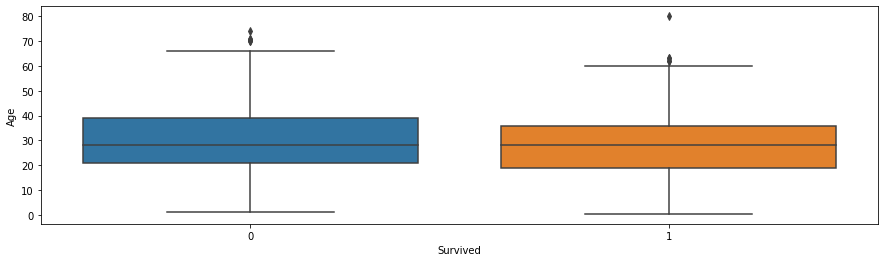

In [6]:
f, ax = plt.subplots(figsize=(15,4))
sns.boxplot(x='Survived', y="Age",  data=ship);

In [7]:
ship.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [8]:
pd.crosstab(ship.Survived,ship.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


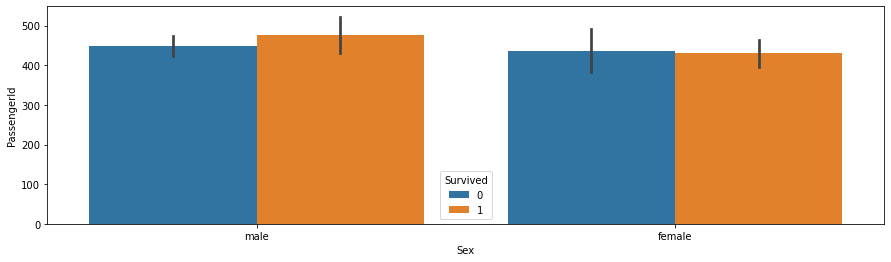

In [20]:
f, ax = plt.subplots(figsize=(15,4))
sns.barplot(x='Sex',y="PassengerId",hue="Survived",data=ship);  #survived male & female as per 0 & 1

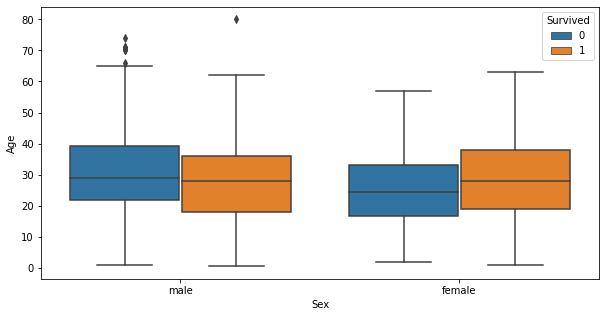

In [10]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Sex", y="Age", hue="Survived", data=ship); # survived males & Females as per age

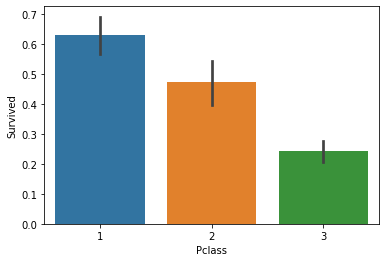

In [11]:
sns.barplot(x="Pclass", y="Survived", data=ship);  # survived as per Pclass

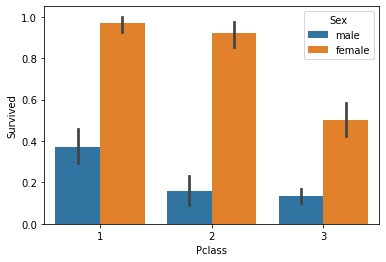

In [12]:
sns.barplot(x="Pclass", y="Survived",hue="Sex", data=ship); # survived in Pclass as per sex

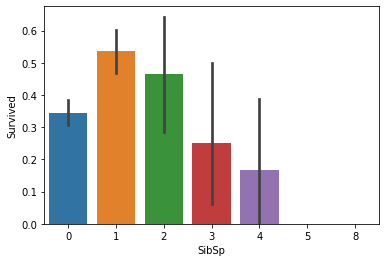

In [13]:
sns.barplot(x="SibSp", y="Survived", data=ship);   # survived as per sibsp

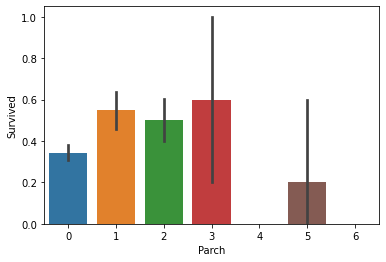

In [15]:
sns.barplot(x="Parch", y="Survived", data=ship); # survived as per parch

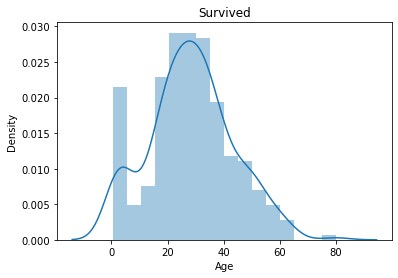

In [29]:
survived = ship.loc[ship['Survived']==1,"Age"].dropna()
sns.distplot(survived)         #frequency dist of survived=1,as per age
plt.title("Survived");

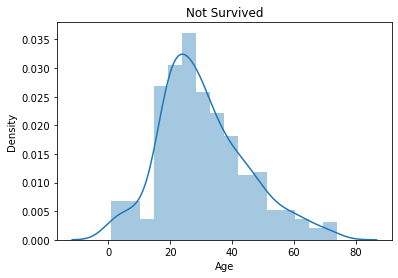

In [31]:
nosurvived = ship.loc[ship['Survived']==0,"Age"].dropna()
sns.distplot(nosurvived)         #frequency dist of not survived=0,as per age
plt.title("Not Survived");

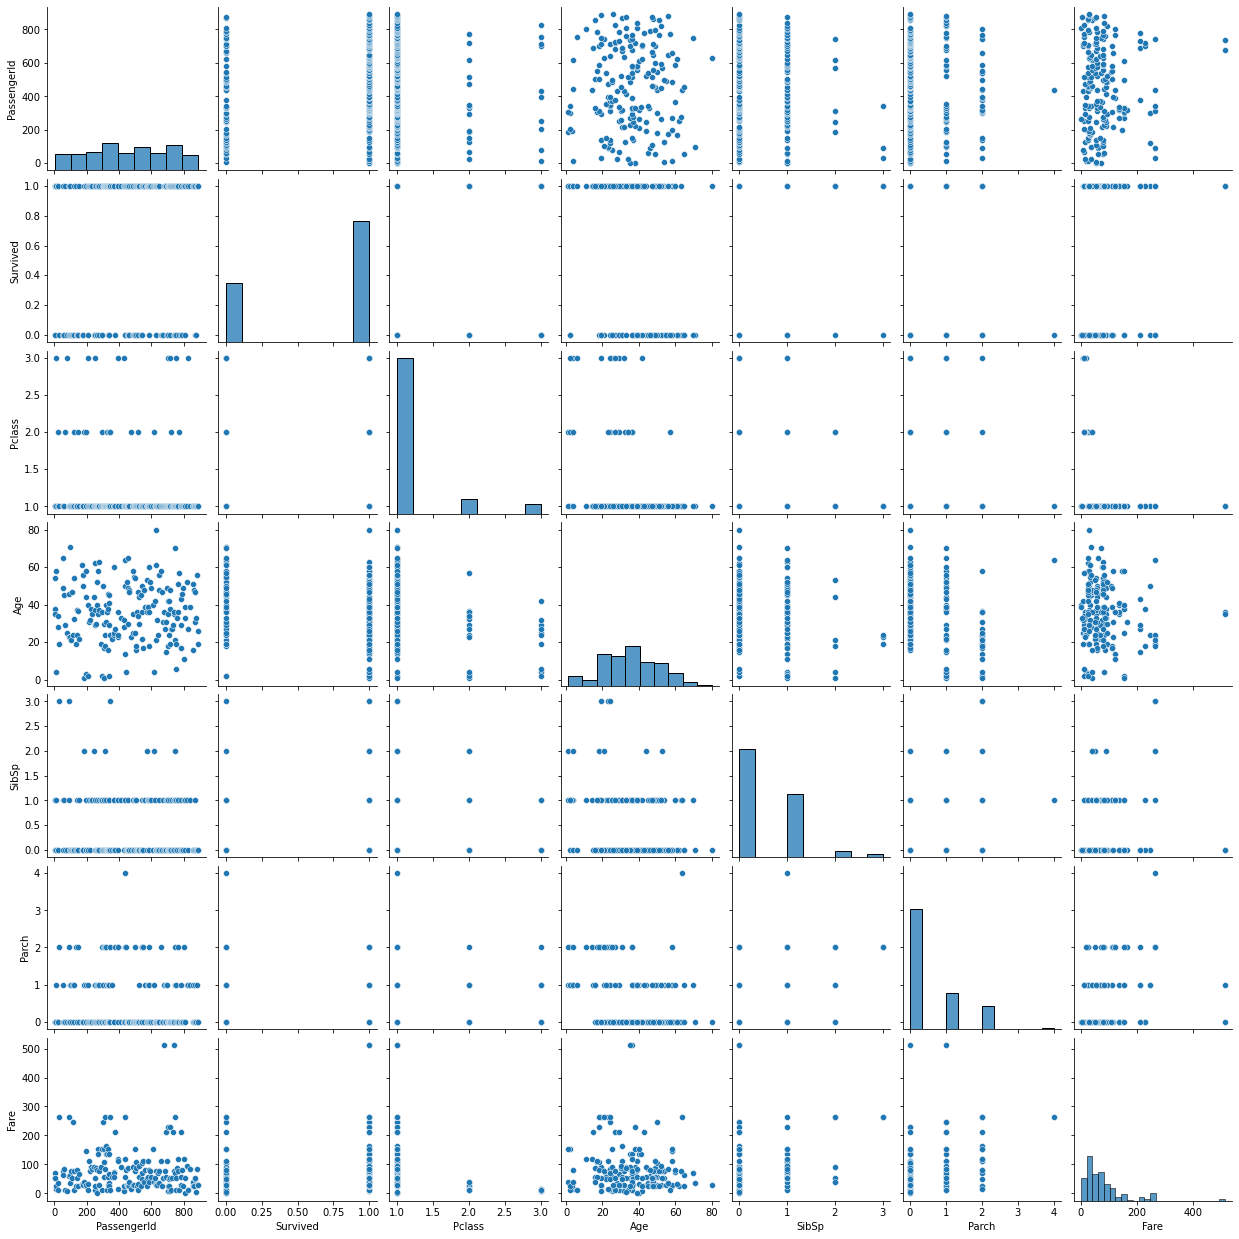

In [37]:
sns.pairplot(ship.dropna());

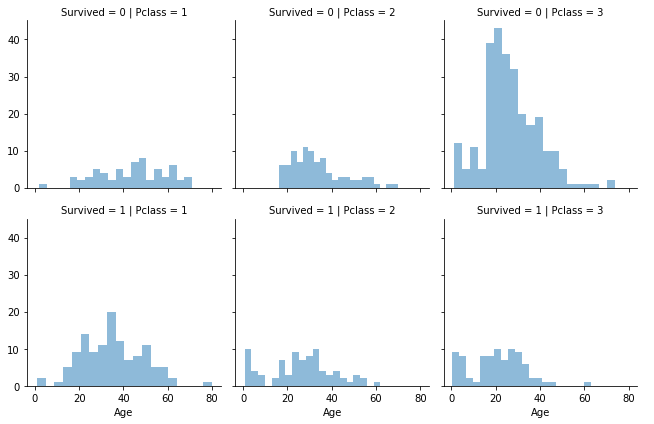

In [72]:
# Pclass vs Survive  #same as subplots
grid = sns.FacetGrid(ship, col='Pclass', row='Survived')  #col & row -divide it as per specified but not in axis
grid.map(plt.hist, 'Age',alpha=.5,bins=20)       # apha=transperancy,here age is the row and col
grid.add_legend();

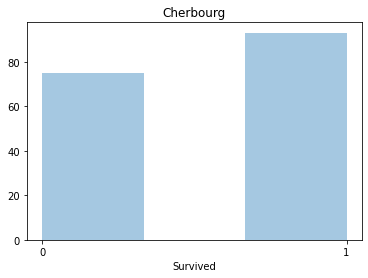

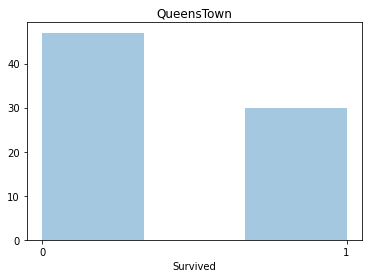

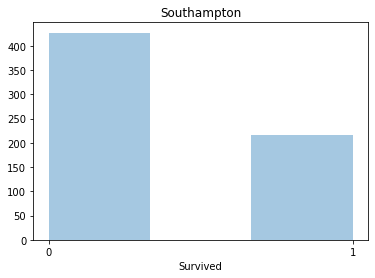

In [79]:
#Distribution plot of survived as per Embarkment
sns.distplot(a=ship[ship['Embarked']=='C']['Survived'],bins=3,kde=False)
plt.title("Cherbourg")
plt.xticks([0,1])
plt.show()

plt.title("QueensTown")
sns.distplot(a=ship[ship['Embarked']=='Q']['Survived'],bins=3,kde=False)
plt.xticks([0,1])

plt.show()
plt.title("Southampton")
sns.distplot(a=ship[ship['Embarked']=='S']['Survived'],bins=3,kde=False)
plt.xticks([0,1])

plt.show()
#Most of the Passengers embarked from Southampton

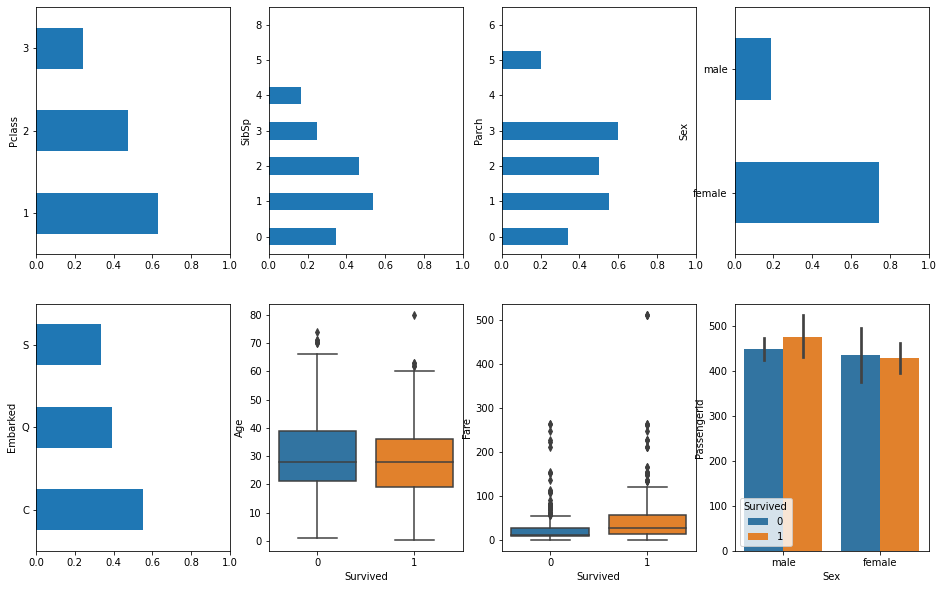

In [89]:
#subplots of all
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
ship.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
ship.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
ship.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
ship.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
ship.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=ship,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=ship,ax=axesbi[1,2])
sns.barplot(x='Sex',y="PassengerId",hue="Survived",data=ship);